# Let's try to do this shit


In [4]:
import pandas as pd

# Load directly from the .csv.gz file
df = pd.read_csv("../data/20211201.csv.gz", compression='gzip')

# Preview the data
df.head()

,DATE,SYMBOL,TIME,ALL_EX,MID_OPEN,SUM_DELTA
0,20211201,A,09:30:00,DNYBTJVPCZUKXHA,152.190,-8.401819
1,20211201,A,09:40:00,PBTJVDZUYKNHCXM,150.490,0.473357
2,20211201,A,09:50:00,KDPBTJVNZUCXYH,151.475,-10.867709
3,20211201,A,10:00:00,DABTJNKYVPZUXCH,150.510,-0.125414
4,20211201,A,10:10:00,DVJTPNKUZYACBXHM,151.960,-1.274648


In [5]:
len(df)

285249

In [6]:
df.head(20)

,DATE,SYMBOL,TIME,ALL_EX,MID_OPEN,SUM_DELTA
0,20211201,A,09:30:00,DNYBTJVPCZUKXHA,152.190,-8.401819
1,20211201,A,09:40:00,PBTJVDZUYKNHCXM,150.490,0.473357
2,20211201,A,09:50:00,KDPBTJVNZUCXYH,151.475,-10.867709
3,20211201,A,10:00:00,DABTJNKYVPZUXCH,150.510,-0.125414
4,20211201,A,10:10:00,DVJTPNKUZYACBXHM,151.960,-1.274648
5,20211201,A,10:20:00,DPCNZUKYTJVHBMAX,151.790,-2.211760
6,20211201,A,10:30:00,TBNPJZYVKDXUCH,151.325,-3.268009
7,20211201,A,10:40:00,PNTZVBCDKJXUHYA,150.990,-1.163491
8,20211201,A,10:50:00,VDTKZNPJBYCUXH,151.375,-4.548476
9,20211201,A,11:00:00,TKVNZDUHPCJBYMXA,151.180,1.319197


In [13]:
df['SYMBOL'].nunique()

9240

<Axes: >

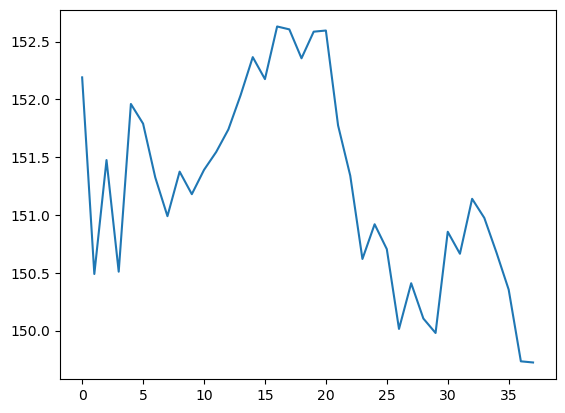

In [10]:
df[df['SYMBOL'] == 'A']['MID_OPEN'].plot()

In [11]:
import seaborn as sns

sns.set_theme()

In [12]:
# /sns.lineplot(data=df[df['SYMBOL' == 'A']], x='TIME', y='MID_OPEN')

KeyError: False

In [18]:
for elem in df['SYMBOL'].unique():
    print(elem)

A
AA
AAA
AAAU
AAC
AACG
AACI
AADI
AADR
AAIC
AAIN
AAL
AAME
AAN
AAOI
AAON
AAP
AAPL
AAQC
AAT
AATC
AAU
AAWW
AAXJ
AB
ABB
ABBV
ABC
ABCB
ABCL
ABCM
ABEO
ABEQ
ABEV
ABG
ABGI
ABIO
ABM
ABMD
ABNB
ABOS
ABR
ABSI
ABST
ABT
ABTX
ABUS
ABVC
AC
ACA
ACAD
ACAH
ACB
ACBI
ACC
ACCD
ACCO
ACEL
ACER
ACES
ACET
ACEV
ACGL
ACH
ACHC
ACHL
ACHR
ACHV
ACI
ACII
ACIO
ACIU
ACIW
ACLS
ACM
ACMR
ACN
ACNB
ACOR
ACP
ACQR
ACR
ACRE
ACRO
ACRS
ACRX
ACSI
ACST
ACT
ACTD
ACTG
ACTV
ACU
ACV
ACVA
ACVF
ACWF
ACWI
ACWV
ACWX
ACXP
ACY
ADAG
ADAP
ADBE
ADC
ADCT
ADER
ADES
ADEX
ADF
ADFI
ADGI
ADI
ADIL
ADIV
ADM
ADMA
ADME
ADMP
ADN
ADNT
ADOC
ADP
ADPT
ADRA
ADRE
ADS
ADSK
ADT
ADTN
ADTX
ADUS
ADV
ADVM
ADX
ADXN
ADXS
AE
AEAC
AEE
AEF
AEFC
AEG
AEHL
AEHR
AEI
AEIS
AEL
AEM
AEMB
AEMD
AENZ
AEO
AEP
AER
AERC
AERI
AES
AESC
AESE
AESR
AEVA
AEY
AEYE
AEZS
AFAQ
AFB
AFBI
AFCG
AFG
AFGB
AFGC
AFGD
AFGE
AFI
AFIB
AFIF
AFIN
AFK
AFL
AFLG
AFMC
AFMD
AFRM
AFSM
AFT
AFTR
AFTY
AFYA
AG
AGAC
AGBA
AGC
AGCB
AGCO
AGD
AGE
AGEN
AGFS
AGFY
AGG
AGGR
AGGY
AGI
AGIL
AGIO
AGL
AGLE
AGM
AGMH
AGNC
AGNG
AGO
AGOV